,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu abnormal
count,1281.000000,1281.000000,1281.000000,1.281000e+03,1281.000000,1280.000000,79.000000
mean,640.000000,9767.708041,17.737194,7.405550e+06,9.329430,4.240625,170.973245
std,369.937157,282.610497,42.464533,1.697999e+03,0.766985,3.866001,57.661087
min,0.000000,8799.000000,2.150226,7.402193e+06,8.000000,0.000000,51.448336
25%,320.000000,9614.000000,3.697088,7.404113e+06,9.000000,0.000000,187.699716
50%,640.000000,9798.000000,4.997458,7.405691e+06,10.000000,7.000000,196.286936
75%,960.000000,10000.000000,8.824107,7.407368e+06,10.000000,7.000000,204.506463
max,1280.000000,11000.000000,229.578756,7.407621e+06,10.000000,12.000000,229.578756


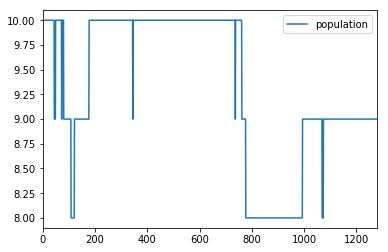

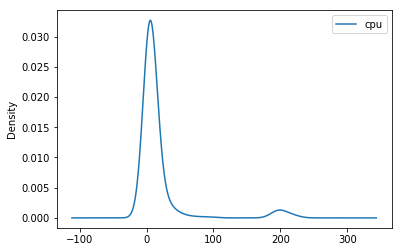

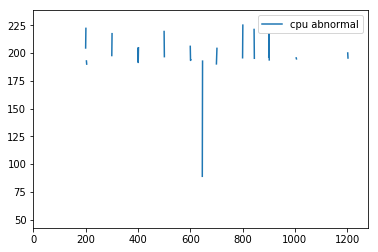

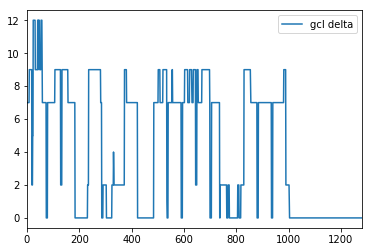

In [2]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]

df.plot(y="population")
df.plot.density(y="cpu")
df.plot(y="cpu abnormal")
df.plot(y="gcl delta")
df.describe()